# **Penting**
- Jangan menambahkan import libary atau function apa pun, selain yang sudah tersedia pada cell code.
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Ingat, tugas Anda hanyalah melengkapi code yang rumpang pada bagian yang sudah ditandai "________" saja.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan juga output yang dihasilkan sesuai dengan output yang diharapkan (expected output). Sehingga Anda dapat mereview sendiri terlebih dahulu output dari cell code yang dijalankan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data

url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.

df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


### **Output yang diharapkan:**

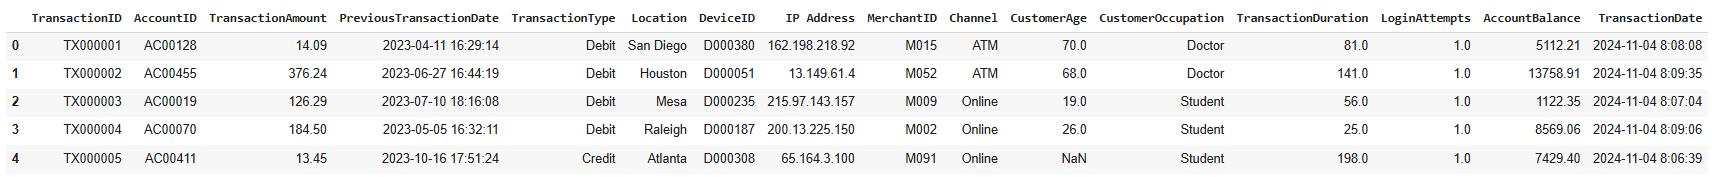

In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

### **Output yang diharapkan:**

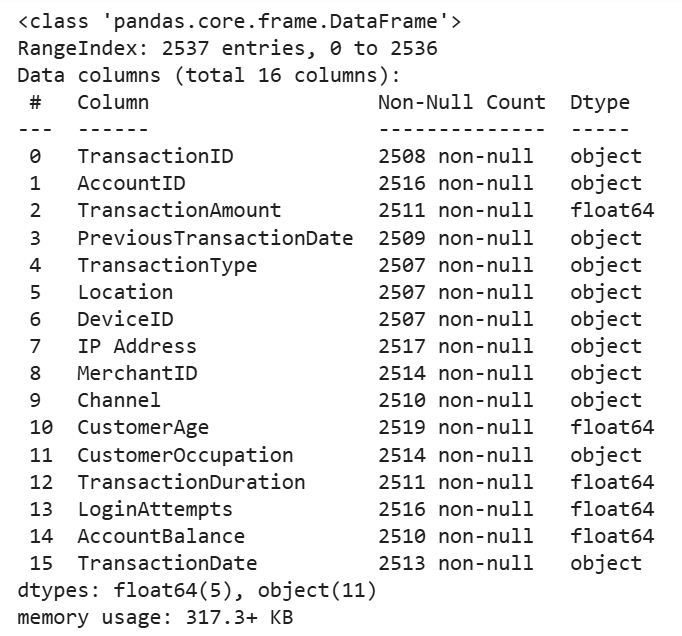

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

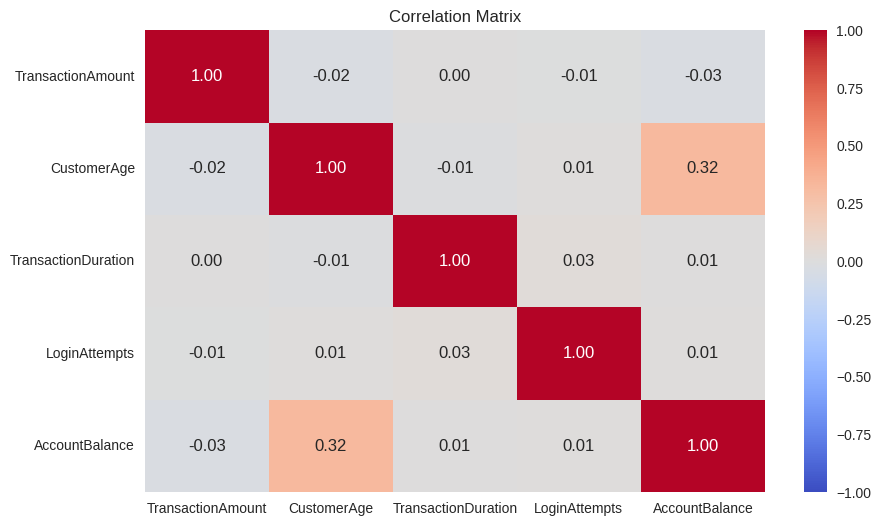

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

## **Output yang diharapkan:**

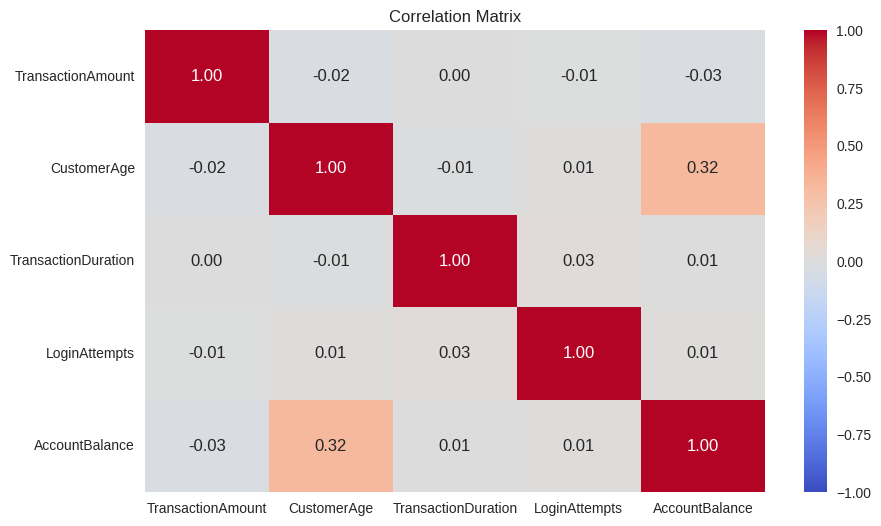

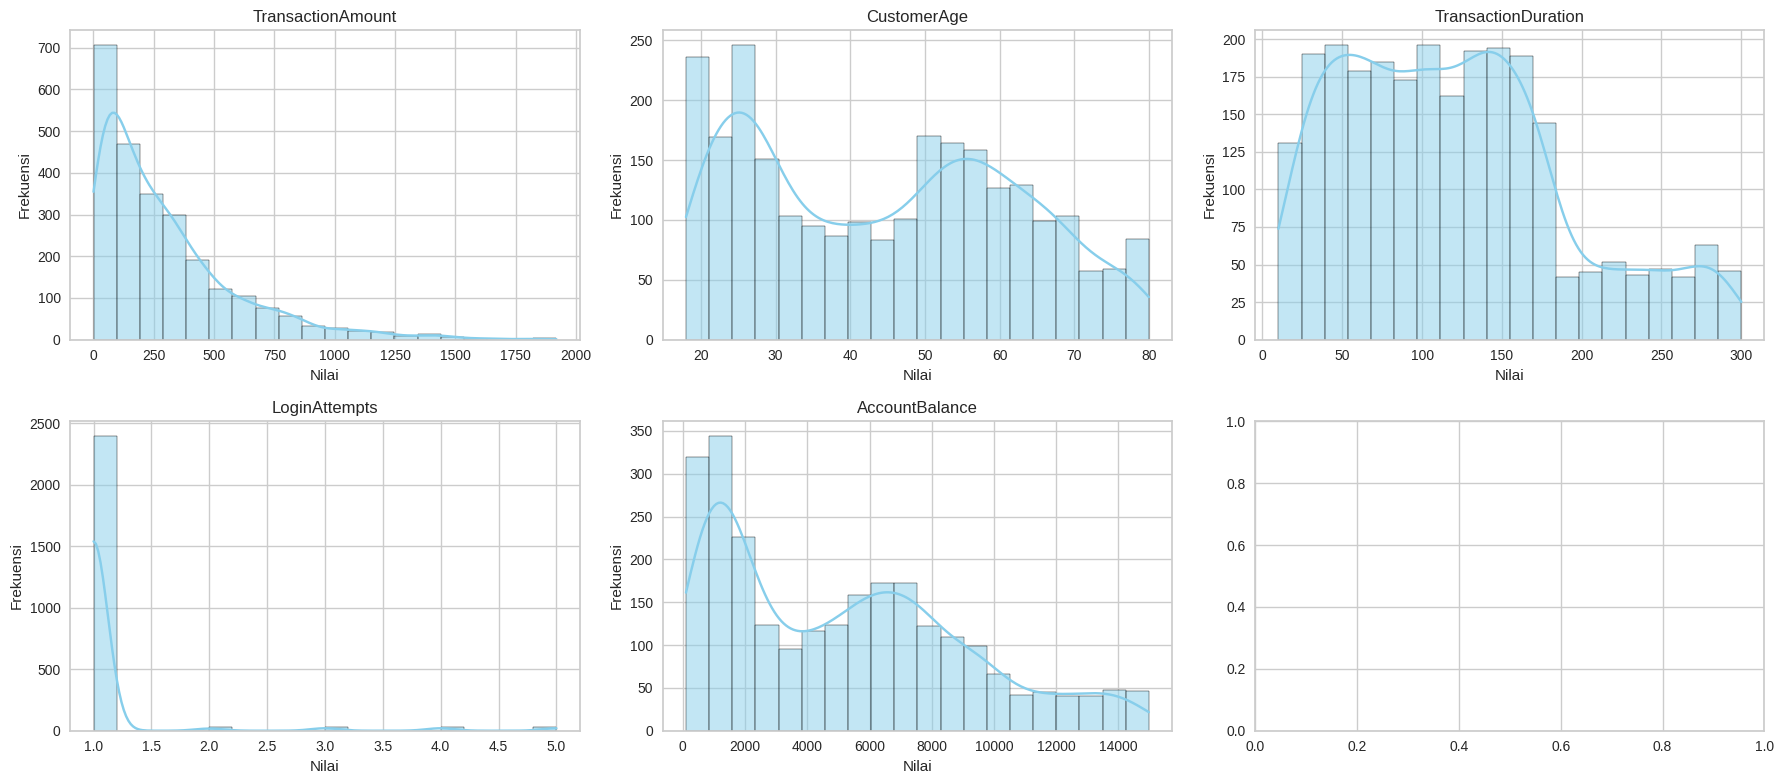

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    # Tampilkan histogram dan pastikan plot ditempatkan di subplot (axes) yang benar
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])

    # Atur judul dan label
    axes[i].set_title(column)
    axes[i].set_xlabel("Nilai")
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

## **Output yang diharapkan:**

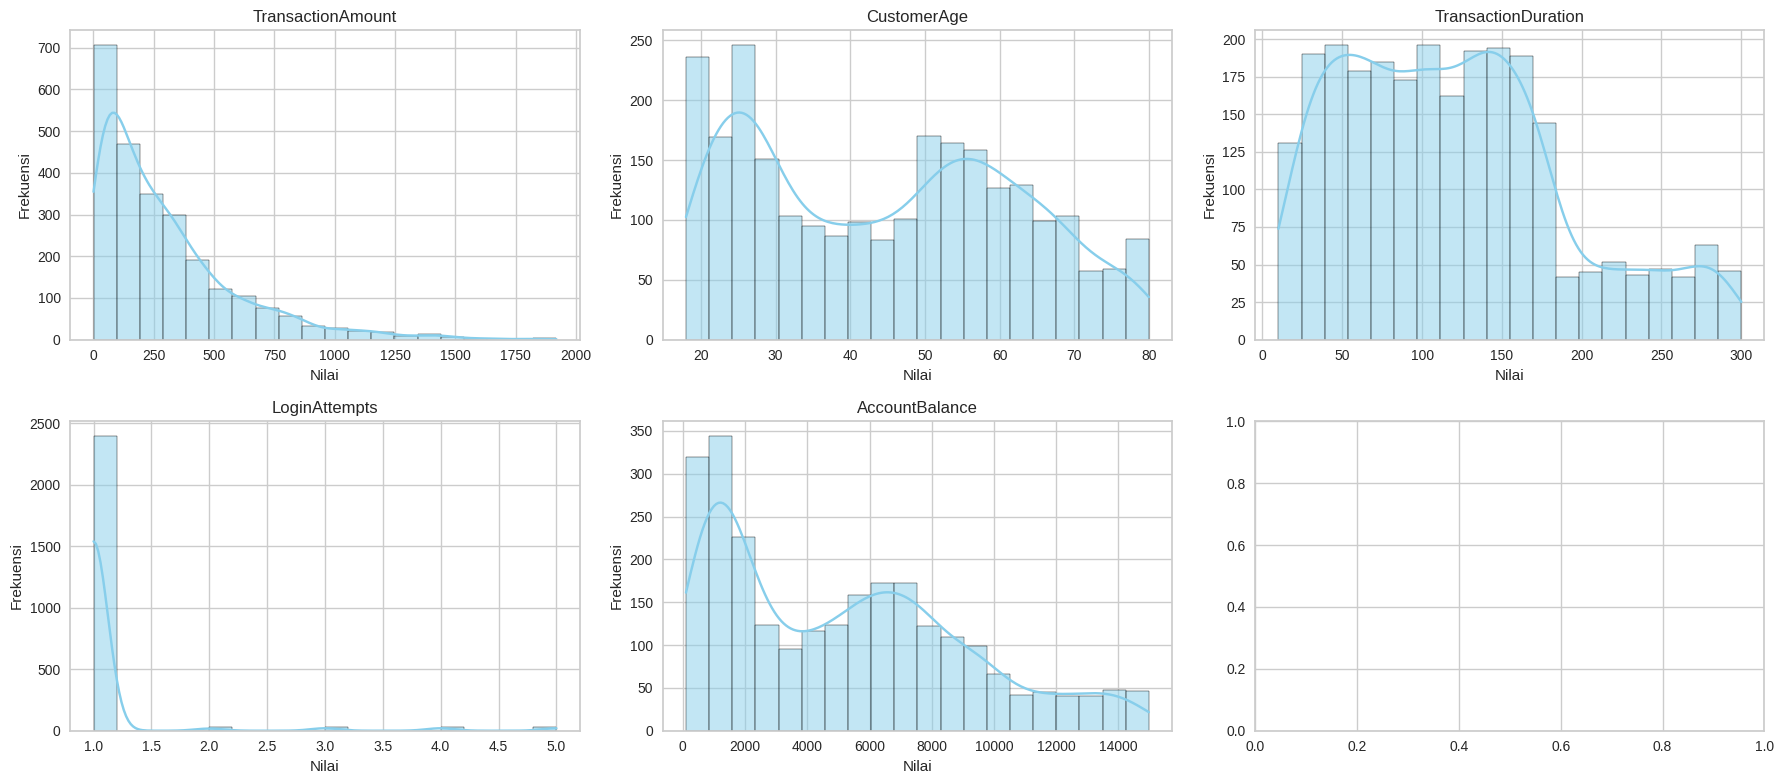

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

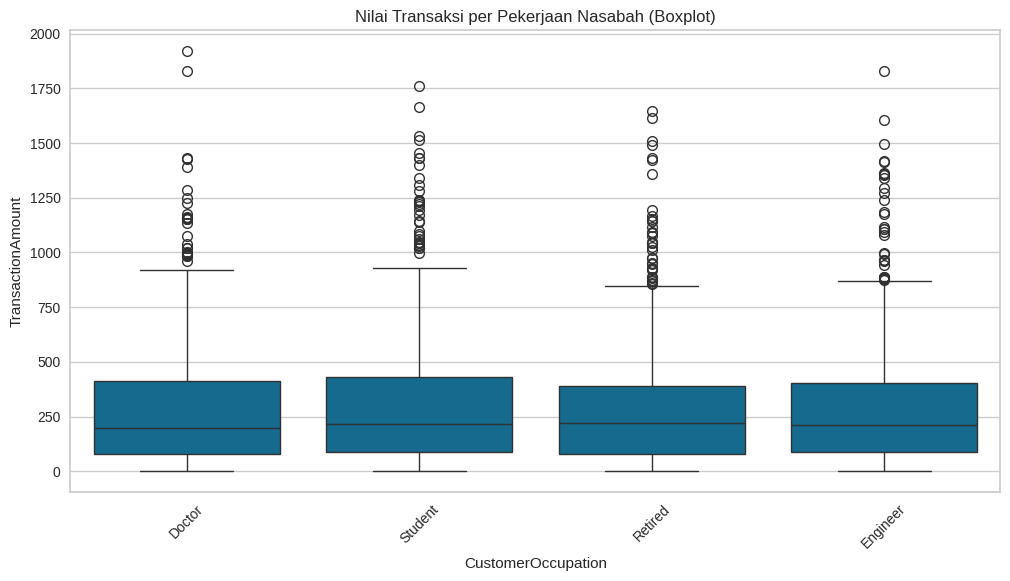

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

plt.figure(figsize=(12, 6))

# Buat visualisasi boxplot untuk melihat sebaran 'TransactionAmount' (y) berdasarkan 'CustomerOccupation' (x)
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (Boxplot)")

# Putar label sumbu-x agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.show()

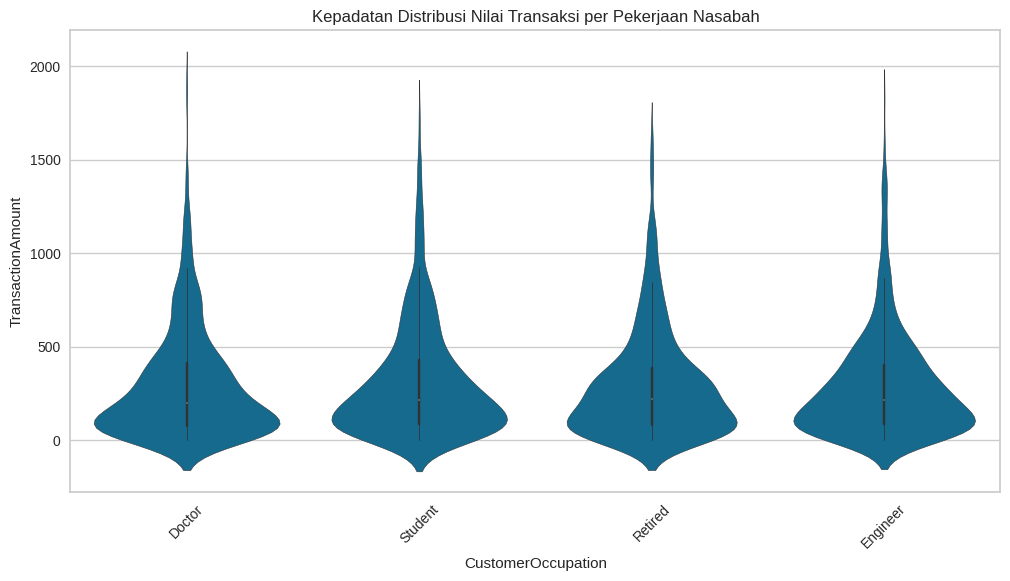

In [ ]:
# Buat visualisasi violinplot untuk melihat kepadatan distribusi data.

plt.figure(figsize=(12, 6))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Kepadatan Distribusi Nilai Transaksi per Pekerjaan Nasabah")
plt.xticks(rotation=45)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan drop pada data null/nan dan data yang duplicate
3. Melakukan drop pada seluruh kolom id, address, dan date.
4. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()

df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


## **Output yang diharapkan:**

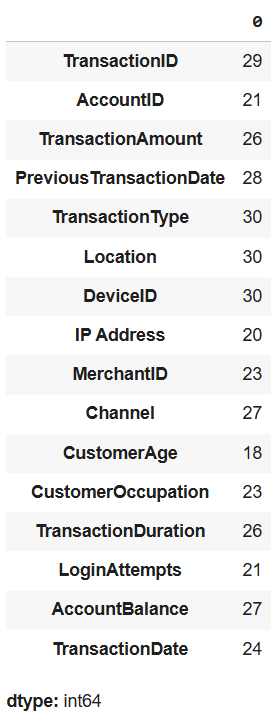

In [ ]:
# Mengecek dataset menggunakan duplicated().sum()

df.duplicated().sum()

np.int64(21)

## **Output yang diharapkan:**

### np.int64(21)

In [ ]:
# Menangani data yang hilang.

# Panggil fungsi untuk menghapus baris yang hilang dan pastikan agar perubahan disimpan kembali ke 'df'
df.dropna(inplace=True)

# Cek kembali dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


## **Output yang diharapkan:**

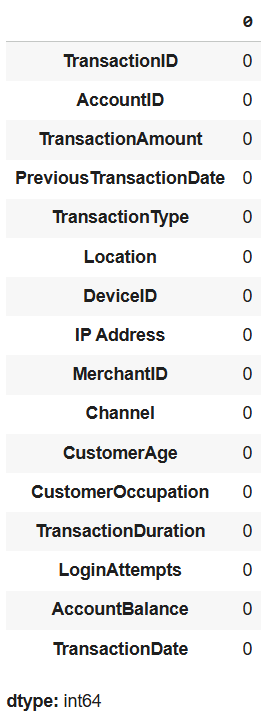

In [ ]:
# Menghapus data duplikat.

# Panggil fungsi untuk menghapus baris duplikat dan pastikan agar perubahan disimpan kembali ke 'df'
df.drop_duplicates(inplace=True)

# Cek kembali dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

## **Output yang diharapkan:**

### np.int64(0)

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan Date, id, dan IP Address

# Buat list comprehension untuk memfilter nama kolom.
#    - Iterasi melalui semua nama kolom (col).
#    - Cek apakah 'id', 'ip', atau 'date' ada di nama kolom.
#    - Gunakan .lower() untuk membuat perbandingan case-insensitive (mengabaikan besar/kecil).

cols_to_drop = [col for col in df.columns if
                'id' in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

# Gunakan fungsi .drop() untuk menghapus kolom-kolom yang ada di 'cols_to_drop'.
df = df.drop(columns=cols_to_drop)

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68


## **Output yang diharapkan:**

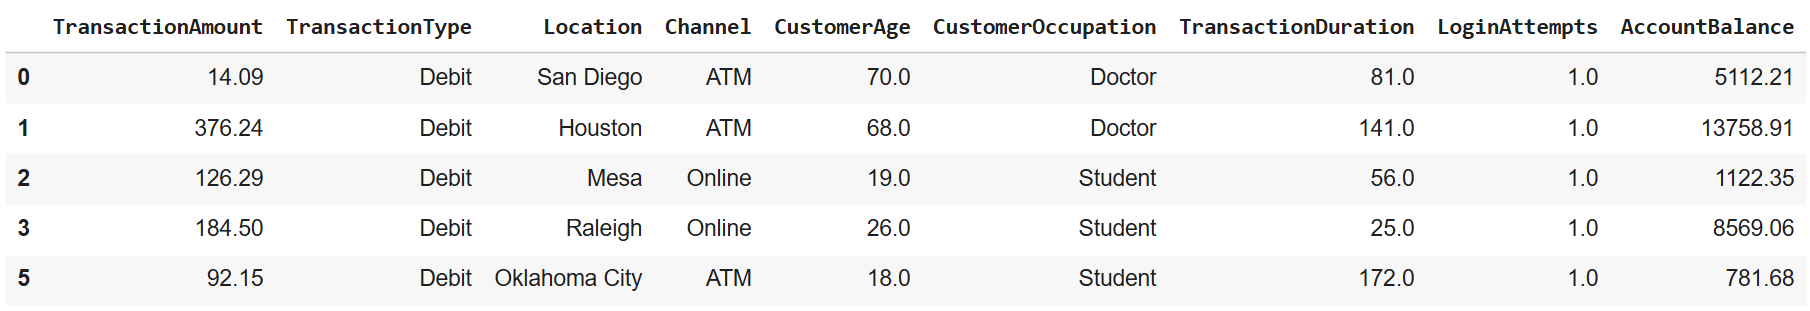

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Pilih semua kolom yang bertipe 'object' (kategorikal)
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_cols:
    # Buat (instantiate) objek LabelEncoder
    label_encoder = LabelEncoder()

    # Terapkan (fit) encoder ke data dan sekaligus ubah (transform) data tersebut
    df[column] = label_encoder.fit_transform(df[column])

    # Simpan encoder
    encoders[column] = label_encoder

# Tampilkan 5 baris pertama untuk memverifikasi hasil encoding
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68


## **Output yang diharapkan:**

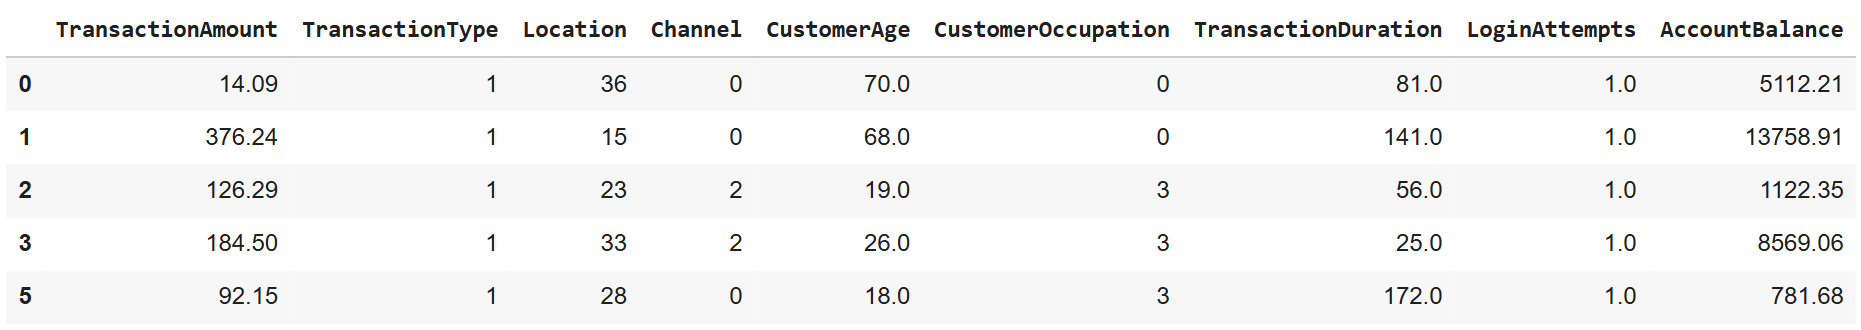

In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.

df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

## **Output yang diharapkan:**

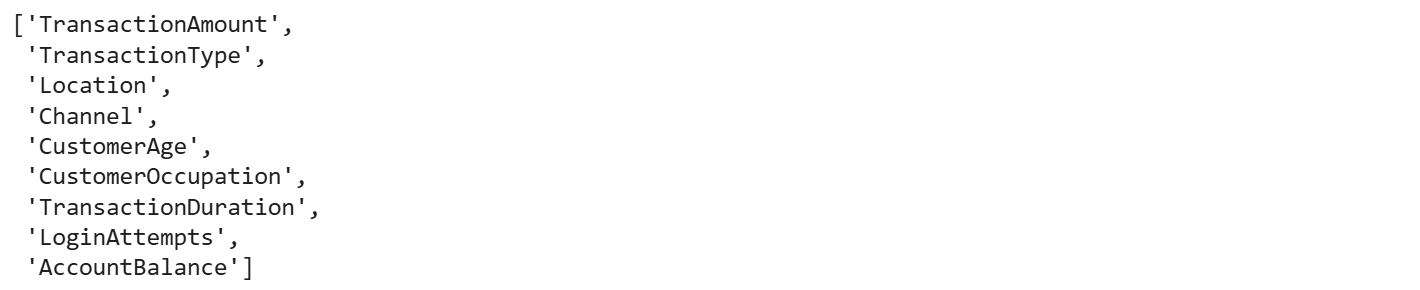

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Melakukan Handling Outlier Data menggunakan metode drop.

for col in numerical_cols:

    # Hitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Hitung Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Tentukan batas bawah (lower bound) dan batas atas (upper bound)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame: Simpan hanya baris di mana nilai 'df[col]' berada DI ANTARA (inklusif) batas bawah dan batas atas.
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Tampilkan statistik deskriptif setelah outlier dihapus
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.0,1945.000000
mean,256.838278,0.771722,21.299743,0.977378,44.693059,1.503342,119.225193,1.0,5100.811913
std,218.370197,0.419830,12.329250,0.804119,17.743453,1.135888,70.600647,0.0,3907.153333
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,102.200000
25%,78.920000,1.000000,11.000000,0.000000,27.000000,0.000000,63.000000,1.0,1488.650000
50%,199.700000,1.000000,21.000000,1.000000,45.000000,1.000000,111.000000,1.0,4693.600000
75%,374.500000,1.000000,32.000000,2.000000,59.000000,3.000000,162.000000,1.0,7659.990000
max,903.190000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,1.0,14977.990000


## **Output yang diharapkan:**

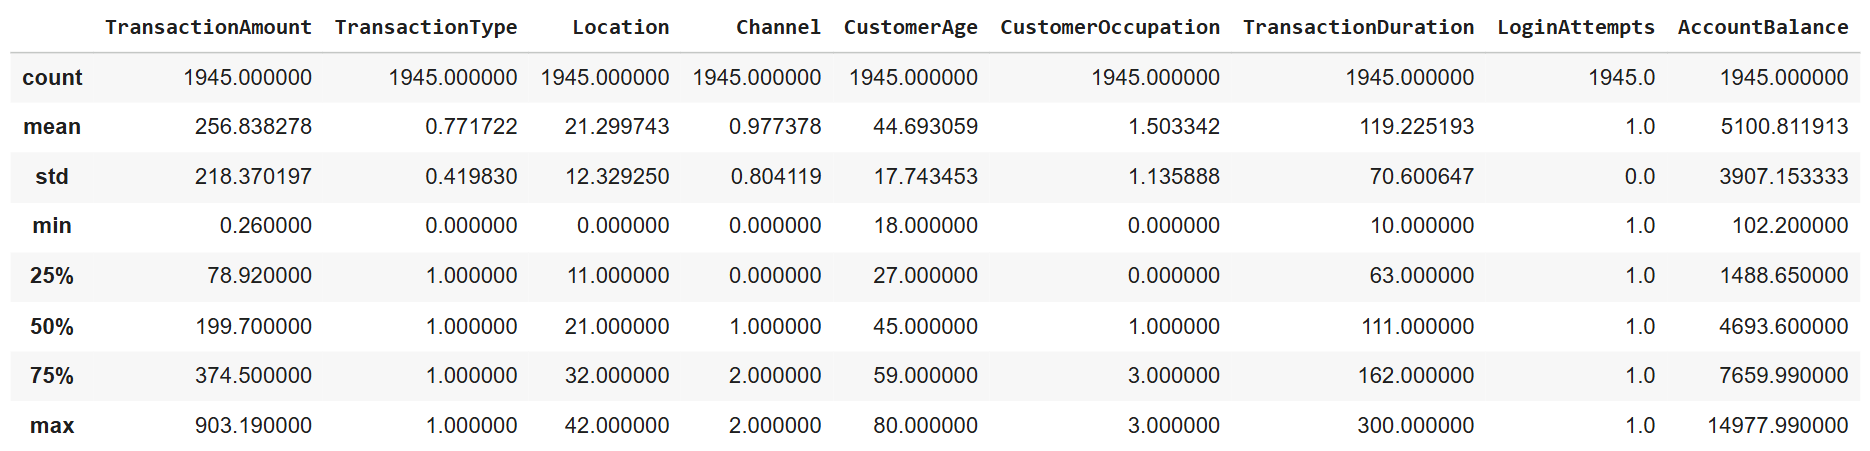

In [ ]:
# Melakukan feature scaling menggunakan StandardScaler() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Buat (instantiate) StandardScaler
scaler = StandardScaler()

# Terapkan (fit) scaler ke data dan sekaligus ubah (transform) data tersebut
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasil scaling
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726


## **Output yang diharapkan:**

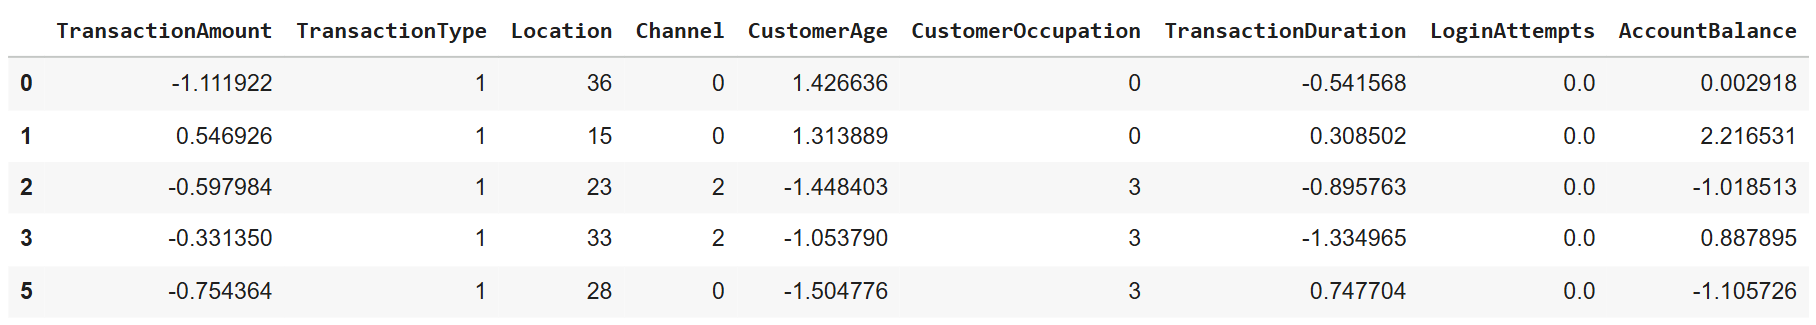

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Tentukan kolom numerik yang ingin Anda kelompokkan
col_to_bin = 'CustomerAge'  # (Isi dengan 'CustomerAge' atau kolom numerik lain)

# Tentukan nama untuk kolom kategori baru
new_col_name = 'CustomerAge_Binned'

# Tentukan label untuk 3 grup (Anda dapat menentukan nama label-nya sendiri)
# Mulai dari rendah --> sedang --> tinggi
bin_labels = ['Muda', 'Dewasa', 'Lansia']

# Gunakan 'pd.qcut' untuk membagi data menjadi 3 kelompok
df[new_col_name] = pd.qcut(df[col_to_bin], q=3, labels=bin_labels, duplicates='drop')

# Lakukan Label Encoding pada kolom baru ini agar menjadi numerik
label_encoder = LabelEncoder()
df[new_col_name] = label_encoder.fit_transform(df[new_col_name])

# Simpan encoder dan tambahkan nama kolom baru ke 'categorical_cols'
encoders[new_col_name] = label_encoder
categorical_cols.extend([new_col_name])

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Binned
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,1
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,2
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,2
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

# Buat salinan (copy) dari 'df' ke variabel 'df_used'
df_used = df.copy()

# Tampilkan ringkasan statistik dari DataFrame 'df'
df_used.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Binned
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000,1.945000e+03,1945.0,1.945000e+03,1945.000000
mean,-8.402305e-17,0.771722,21.299743,0.977378,-1.269479e-16,1.503342,2.557223e-17,0.0,-6.027740e-17,1.015424
std,1.000257e+00,0.419830,12.329250,0.804119,1.000257e+00,1.135888,1.000257e+00,0.0,1.000257e+00,0.820123
min,-1.175271e+00,0.000000,0.000000,0.000000,-1.504776e+00,0.000000,-1.547483e+00,0.0,-1.279678e+00,0.000000
25%,-8.149648e-01,1.000000,11.000000,0.000000,-9.974163e-01,0.000000,-7.965883e-01,0.0,-9.247374e-01,0.000000
50%,-2.617251e-01,1.000000,21.000000,1.000000,1.730327e-02,1.000000,-1.165330e-01,0.0,-1.042490e-01,1.000000
75%,5.389562e-01,1.000000,32.000000,2.000000,8.065296e-01,3.000000,6.060257e-01,0.0,6.551666e-01,2.000000
max,2.960651e+00,1.000000,42.000000,2.000000,1.990369e+00,3.000000,2.561185e+00,0.0,2.528623e+00,2.000000


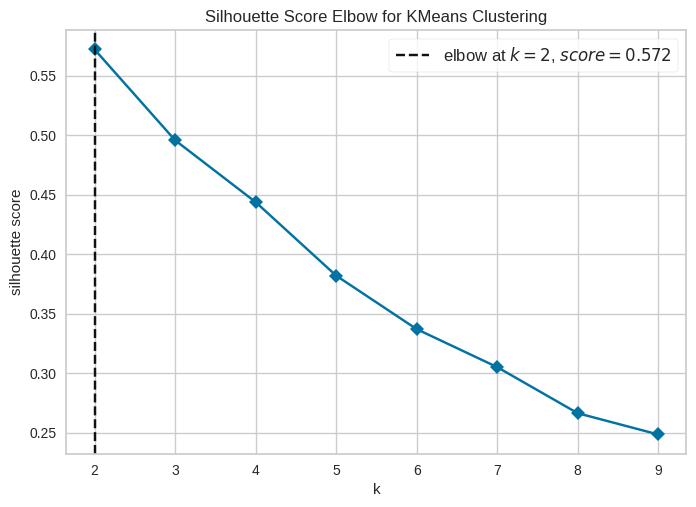

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Buat (instantiate) model clustering
model = KMeans()

# Buat (instantiate) KElbowVisualizer
#  - Masukkan 'model' yang akan digunakan
#  - Tentukan jumlah cluster yang akan diuji (range 2 sampai 10)
#  - Tentukan 'metric' evaluasi
visualizer = KElbowVisualizer(model,
                       k=(2,10),
                       metric='silhouette',
                       timings=False)

# Jalankan (fit) visualizer pada data
visualizer.fit(df)

# Tampilkan plot
visualizer.show()

## **Output yang diharapkan** (bisa saja sedikit berbeda)**:**

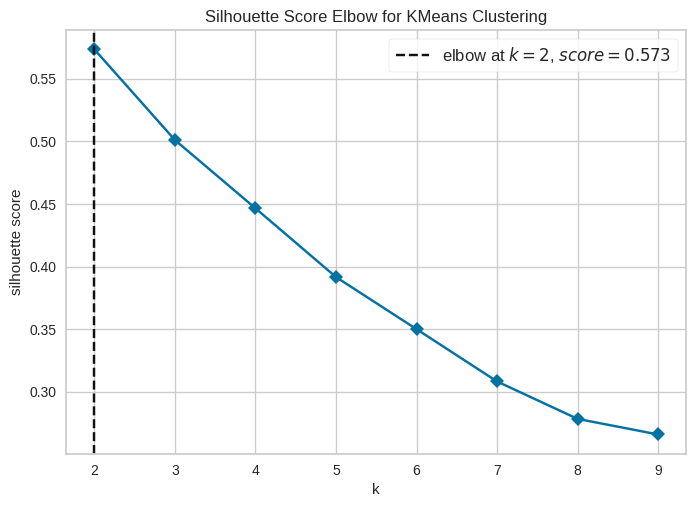

In [ ]:
# Menggunakan algoritma K-Means Clustering

# Buat (instantiate) objek model KMeans
#  - Tentukan jumlah cluster (n_clusters)
kmeans_model = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model dengan data Anda (df)
kmeans_model.fit(df)

KMeans(n_clusters=2, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib

# Simpan model clustering yang sudah dilatih
joblib.dump(kmeans_model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

# Dapatkan hasil (label) cluster dari model 'kmeans' yang telah di-fit
labels = kmeans_model.labels_

# Panggil fungsi untuk menghitung silhouette score
score = silhouette_score(df, labels)

# Cetak skornya
print("Silhouette Score:", score)

Silhouette Score: 0.5720739691275379


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


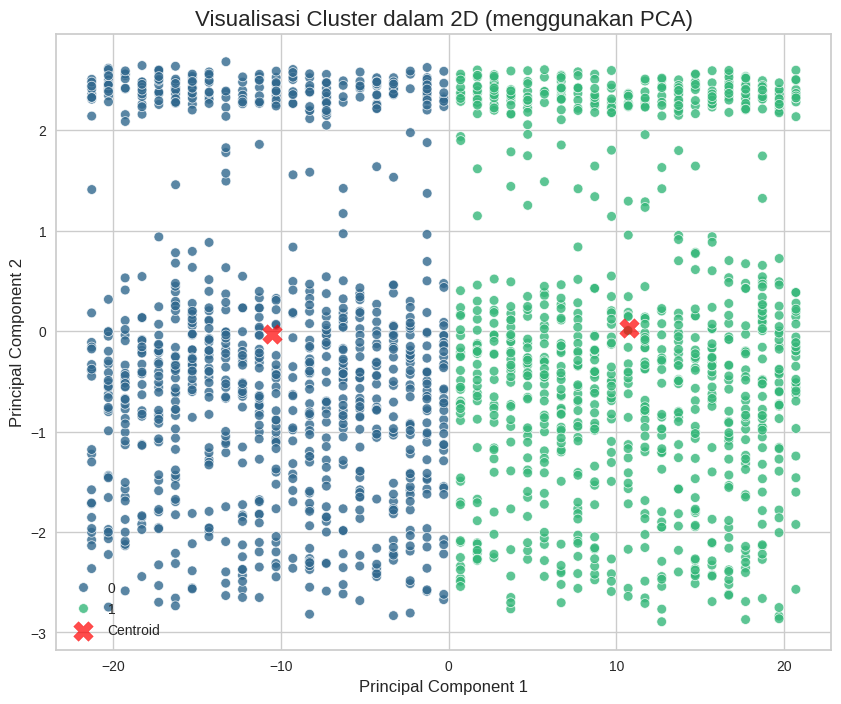

In [ ]:
# Membuat visualisasi hasil clustering

# Buat model KMeans dengan 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit model ke data dan mendapatkan labels
kmeans.fit(df)
labels = kmeans.labels_

# Buat (instantiate) objek PCA untuk 2 komponen (n_components=2)
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df' dan transformasikan data tersebut
df_pca = pca.fit_transform(df)

# Buat DataFrame baru 'df_pca' dari hasil transformasi
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Tambahkan kolom 'Cluster' ke 'df_pca' menggunakan 'labels'(variabel dari hasil 'kmeans.labels_' sebelumnya)
df_pca['Cluster'] = labels

# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',  # Warnai titik berdasarkan kolom 'Cluster'
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)

plt.title('Visualisasi Cluster dalam 2D (menggunakan PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend()
plt.show()

## **Output yang diharapkan** (bisa saja sedikit berbeda)**:**

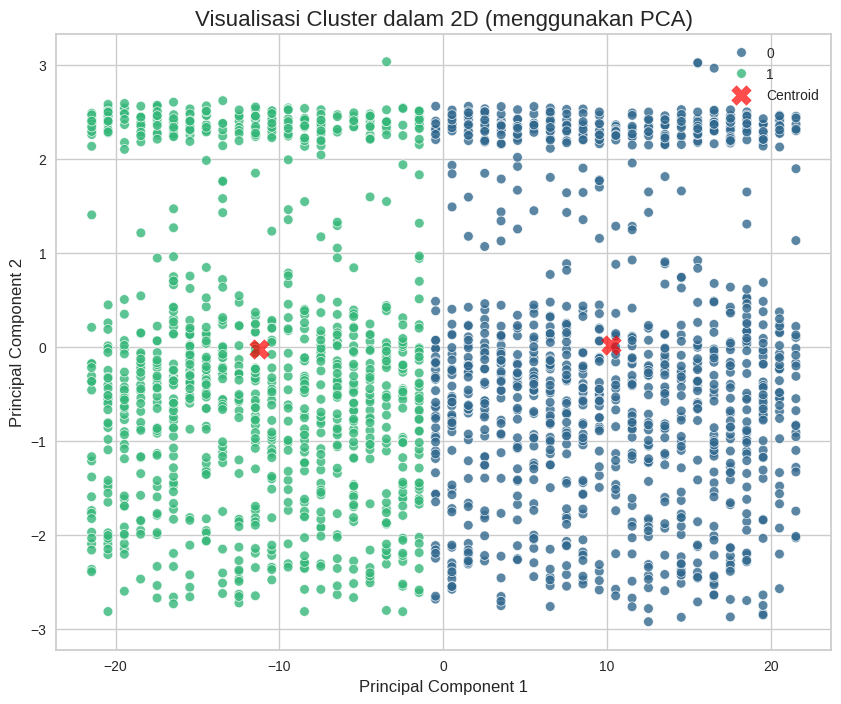

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

# Buat (instantiate) objek PCA dengan 2 komponen
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df_used' dan transformasikan data tersebut
df_pca_array = pca.fit_transform(df_used)

# Buat DataFrame baru 'data_final' dari hasil array PCA
data_final = pd.DataFrame(data=df_pca_array, columns=['PCA1', 'PCA2'])

# Buat (instantiate) model KMeans BARU
kmeans_pca = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model KMeans BARU ini HANYA pada 'data_final'
kmeans_pca.fit(data_final)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")

# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Transaction Amount:** -0.01
  - **Rata-rata (mean) Customer Age:** 0.32
  - **Analisis:** Cluster ini mencakup pelanggan usia lanjut usia dengan jumlah transaksi yang dilakukan cukup rendah. Pelanggan dalam cluster ini cenderung memiliki daya beli yang rendah dan cenderung bermain aman. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan dengan resiko rendah.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Tambahkan kolom 'Cluster' baru berupa 'labels' (variabel dari 'kmeans.labels_' sebelumnya)
df_used['Cluster'] = labels

# Kelompokkan (groupby) 'df_used' berdasarkan 'Cluster' dan hitung agregasi untuk 'numerical_cols'.
agg_summary = df_used.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Tampilkan hasil ringkasan
display(agg_summary)

Cluster                      0     1
TransactionAmount   mean -0.01  0.01
                    min  -1.17 -1.18
                    max   2.96  2.90
CustomerAge         mean  0.02 -0.02
                    min  -1.50 -1.50
                    max   1.99  1.99
TransactionDuration mean  0.03 -0.03
                    min  -1.55 -1.55
                    max   2.56  2.55
LoginAttempts       mean  0.00  0.00
                    min   0.00  0.00
                    max   0.00  0.00
AccountBalance      mean  0.01 -0.01
                    min  -1.28 -1.28
                    max   2.52  2.53

# **⚠️PERHATIAN: JAWAB DI BAWAH SINI**
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya sebelum **Inverse** (masih dalam kondisi **Scaled**).
1. **CLUSTER 0: ([Pengguna Paling Rendah])**:
  - **Rata-rata (mean) <TransactionAmount>:** -0.01, dengan nilai transaksi terendah -1.17 dan tertinggi 2.96 (Nilai sedikit dibawah rata-rata)
  - **Rata-rata (mean) <CustomerAge>:** 0.02, dengan umur terendah -1.50 tahun dan tertinggi 1.99 tahun (Nilai sedikit di atas rata-rata)
  - **Rata-rata (mean) <TransactionDuration>:** 0.03, dengan durasi terendah -1.55 dan tertinggi 2.56 (Nilai sedikit di atas rata-rata)
  - **Rata-rata (mean) <LoginAttempts>:** 0.00 (Nilai sama dengan rata-rata)
  - **Rata-rata (mean) <AccountBalance>:** 0.01, dengan saldo terendah -1.28 dan tertinggi 2.52 (Nilai sedikit di atas rata-rata)
  - **Analisis:** Cluster 0 secara keseluruhan menunjukkan karakteristik yang sangat mendekati rata-rata umum atau bisa dibilang normal. Nasabah dalam cluster ini tidak memiliki perbedaan signifikan dalam jumlah transaksi, usia, durasi transaksi, upaya login, maupun saldo akun dibandingkan dengan rata-rata semua pelanggan. Cluster ini merepresentasikan sebagai 'pelanggan tipikal' atau stabil dan tidak mencurigakan.
2. **CLUSTER 1: ([Pengguna Aktif])**:
  - **Rata-rata (mean) <TransactionAmount>:** 0.01, dengan nilai transaksi terendah -1.18 dan tertinggi 2.90 (Nilai sedikit di atas rata-rata)
  - **Rata-rata (mean) <CustomerAge>:** -0.02, umur terendah -1.50 tahun dan tertinggi 1.99 tahun (Nilai sedikit di bawah rata-rata)
  - **Rata-rata (mean) <TransactionDuration>:** -0.03, nilai durasi terendah -1.55 dan tertinggi 2.55 (Nilai sedikit di bawah rata-rata)
  - **Rata-rata (mean) <LoginAttempts>:** 0.00 (Nilai sama dengan rata-rata)
  - **Rata-rata (mean) <AccountBalance>:** -0.01, saldo terendah -1.28 dan tertinggi 2.53 (Nilai sedikit di bawah rata-rata)
  - **Analisis:** Cluster 1 secara keseluruhan menunjukkan karakteristik yang sangat mendekati rata-rata umum atau bisa dibilang normal. Perbedaan rata-rata fitur-fitur numerik pada cluster ini sangat kecil dari 0, hal itu berarti nasabah dalam cluster ini juga merupakan 'pelanggan tipikal' yang tidak memiliki perilaku transaksi, usia, durasi transaksi, upaya login, maupun saldo akun yang signifikan berbeda rata-rata semua nasabah. Cluster 1 kemungkinan mewakili nasabah yang aktif dalam transaksi meskipun dengan saldo yang rendah.  


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

df_used.rename(columns={"Cluster": "Target"}, inplace=True)

# Tampilkan 5 baris pertama untuk memverifikasi
df_used.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Binned,Target
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,1,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,1,0
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,2,1
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,2,1
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,2,1


In [ ]:
# Simpan Data

df_used.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal

df_inverse = df_used.copy()

# Gunakan 'scaler' untuk mengembalikan 'numerical_cols' ke nilai aslinya.
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Binned,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,1,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,1,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,2,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,2,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,2,1


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.

for column in categorical_cols:
    # Ambil encoder yang tepat untuk 'column' dari dictionary 'encoders'
    encoder = encoders[column]

    # Gunakan scaler untuk mengembalikan (inverse) kolom tersebut
    df_inverse[column] = encoder.inverse_transform(df_inverse[column].astype(int))

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Binned,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Lansia,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Lansia,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Muda,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Muda,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Muda,1


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'numerical_cols'.
agg_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'categorical_cols'.
#   - Hitung agregasi (agg) 'mode' (nilai yang paling sering muncul).
#   - (Kita gunakan 'lambda x: x.mode()[0]' untuk mengambil nilai mode pertama)
agg_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0]).round(2).T

# Tampilkan kedua hasil ringkasan
display(agg_summary_num)
display(agg_summary_cat)

Target                           0         1
TransactionAmount   mean    255.55    258.15
                    min       0.32      0.26
                    max     903.19    889.01
CustomerAge         mean     45.06     44.33
                    min      18.00     18.00
                    max      80.00     80.00
TransactionDuration mean    121.12    117.30
                    min      10.00     10.00
                    max     300.00    299.00
LoginAttempts       mean      1.00      1.00
                    min       1.00      1.00
                    max       1.00      1.00
AccountBalance      mean   5142.17   5058.81
                    min     117.98    102.20
                    max   14942.78  14977.99

Target,0,1
TransactionType,Debit,Debit
Location,Charlotte,Tucson
Channel,Branch,Branch
CustomerOccupation,Doctor,Student
CustomerAge_Binned,Dewasa,Muda


# **⚠️PERHATIAN: JAWAB DI BAWAH SINI**
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah **Inverse**.
1. **Cluster 0: (Established Professionals - Charlotte Branch)**:
  - **Rata-rata (mean) TransactionAmount:** 255.55, dengan nilai transaksi terendah 0.32 dan tertinggi 903.19
  - **Rata-rata (mean) CustomerAge:** 45.06 tahun, dengan usia termuda 18 tahun dan tertua 80 tahun.
  - **Rata-rata (mean) TransactionDuration:** 121.12 detik, dengan durasi terpendek 10 detik dan terpanjang 300 detik.
  - **Rata-rata (mean) AccountBalance:** 5142.17, dengan saldo terendah 117.98 dan tertinggi 14942.78
  - **Analisis:** Cluster 0 cenderung mewakili segmen nasabah yang konservatif dan stabil. Mereka memiliki rata-rata transaksi dan saldo akun yang moderat, tidak terlalu tinggi atau rendah. Usia mereka sebagian besar dewasa hingga lansia dan seringkali berprofesi sebagai 'Doctor'. Durasi transaksi mereka juga cenderung normal. Ini mengindikasi bahwa mereka adalah nasabah yang dapat diandalkan, ada kemungkinan mencari keamanan dalam bertransaksi dan mungkin tertarik pada produk yang menawarkan stabilitas dan pertumbuhan yang konservatif.
2. **Cluster 1: (Young Urban Student - Tucson Branch)**:

  **Fitur Numerik**
  - **Rata-rata (mean) TransactionAmount:** 258.15, dengan nilai transaksi terendah 0.26 dan tertinggi 889.01
  - **Rata-rata (mean) CustomerAge:** 44.33 tahun, dengan usia termuda 18 tahun dan tertua 80 tahun.
  - **Rata-rata (mean) TransactionDuration:** 117.30 detik, dengan durasi terpendek 10 detik dan terpanjang 299 detik.
  - **Rata-rata (mean) AccountBalance:** 5058.81, dengan saldo terendah 102.20 dan tertinggi 14977.99

  **Fitur Kategorikal**
  - **TransactionType:** Debit
  - **Location:** Tucson
  - **Channel:** Online
  - **CustomerOccupation:** Student
  - **CustomerAge:** Muda
  - **Analisis:** Cluster 1 cenderung mewakili nasabah yang muda dan aktif bertransaksi secara online dengan durasi transaksi yang relatif cepat. Meskipun rata-rata usia mereka sedikit di bawah rata-rata keseluruhan, mereka masih termasuk dalam kategori 'Dewasa' dan 'Muda'. Profesi yang dominan adalah 'Student', yang konsisten dengan karakteristik usia muda. Mayoritas transaksi mereka adalah 'Debit' yang dilakukan secara 'Online' dan berlokasi di 'Tuscon'. Rata-rata saldo akun mereka sedikit dibawah rata-rata keseluruhan. Ini mengindikasi bahwa mereka adalah nasabah yang nyaman dengan teknologi, sering melakukan transaksi digital, dan mungkin tertarik pada produk yang menargetkan gaya hidup digital dan kebutuhan finansial fleksibel.  




(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Periksa kembali data yang telah di-inverse.

df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_Binned,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Lansia,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Lansia,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Muda,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Muda,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Muda,1


In [ ]:
# Simpan Data Inverse

df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.